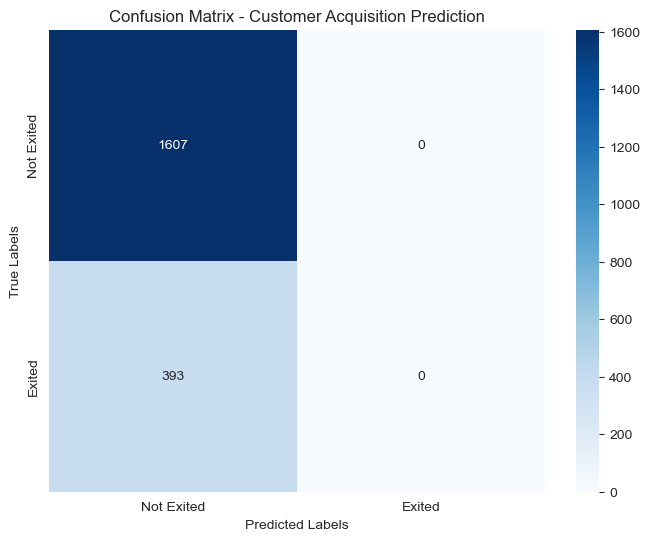

Customer Acquisition Prediction:
Accuracy: 80.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       1.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.72      2000


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data from CSV file
data = pd.read_csv('data.csv')

# Decision Trees or Random Forest for Predicting Customer Acquisition
target_variable_acquisition = 'Exited'
features_acquisition = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', target_variable_acquisition])
X_train, X_test, y_train, y_test = train_test_split(features_acquisition, data[target_variable_acquisition], test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = ['Geography', 'Gender', 'Card Type']

# Create pipeline for preprocessing categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess features with categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Random Forest classifier with preprocessing pipeline
random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model and make predictions
random_forest.fit(X_train, y_train)
predictions_acquisition = random_forest.predict(X_test)
accuracy_acquisition = accuracy_score(y_test, predictions_acquisition)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_acquisition, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - Customer Acquisition Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print results
print("Customer Acquisition Prediction:")
print(f"Accuracy: {accuracy_acquisition:.2%}")
print("Classification Report:")
print(classification_report(y_test, predictions_acquisition, zero_division=1))


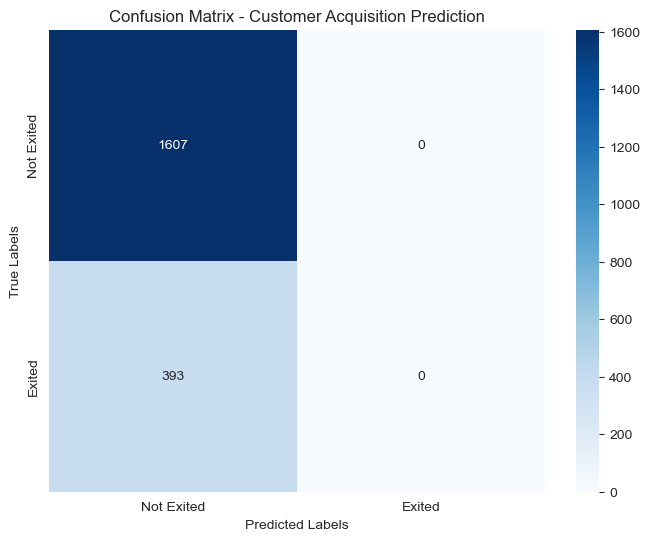

Customer Acquisition Prediction:
Accuracy: 80.35%

Classification Report:
              precision  recall  f1-score    support
0              0.803500  1.0000  0.891045  1607.0000
1              1.000000  0.0000  0.000000   393.0000
accuracy       0.803500  0.8035  0.803500     0.8035
macro avg      0.901750  0.5000  0.445523  2000.0000
weighted avg   0.842112  0.8035  0.715955  2000.0000


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data from CSV file
data = pd.read_csv('data.csv')

# Decision Trees or Random Forest for Predicting Customer Acquisition
target_variable_acquisition = 'Exited'
features_acquisition = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', target_variable_acquisition])
X_train, X_test, y_train, y_test = train_test_split(features_acquisition, data[target_variable_acquisition], test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = ['Geography', 'Gender', 'Card Type']

# Create pipeline for preprocessing categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess features with categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Random Forest classifier with preprocessing pipeline
random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model and make predictions
random_forest.fit(X_train, y_train)
predictions_acquisition = random_forest.predict(X_test)
accuracy_acquisition = accuracy_score(y_test, predictions_acquisition)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_acquisition, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - Customer Acquisition Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print results in a table without warning messages
classification_report_df = pd.DataFrame.from_dict(classification_report(y_test, predictions_acquisition, output_dict=True, zero_division=1)).T
print("Customer Acquisition Prediction:")
print(f"Accuracy: {accuracy_acquisition:.2%}")
print("\nClassification Report:")
print(classification_report_df)


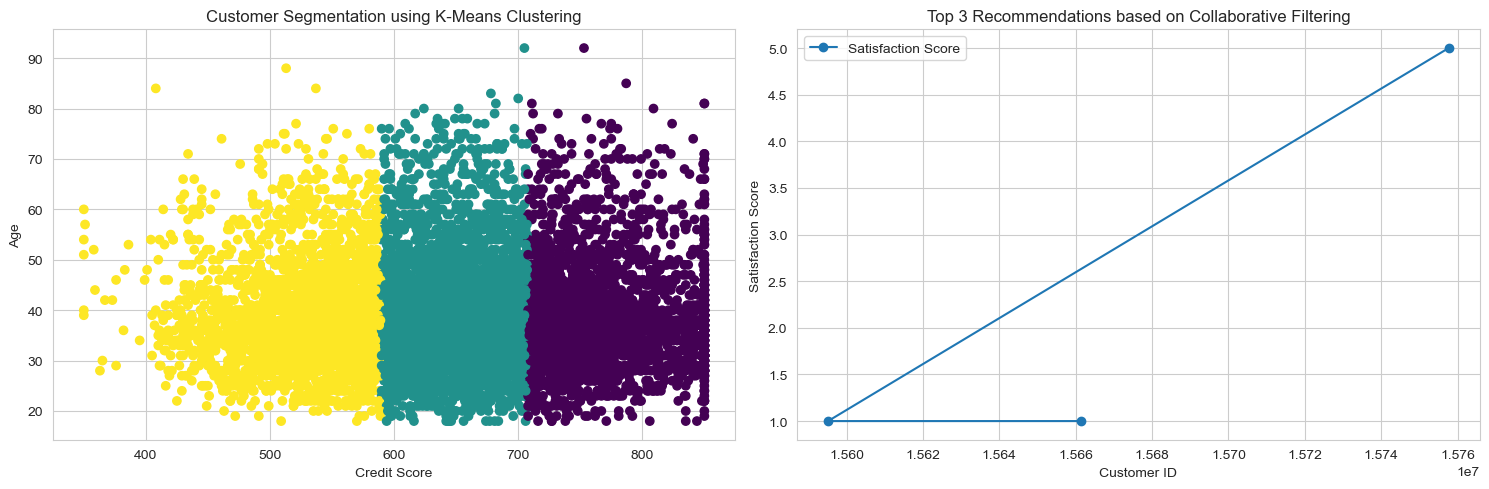

Churn Prediction (Customer Retention) Results:
Accuracy: 80.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       1.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.72      2000


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity
# Load data
data = pd.read_csv('data.csv')

# K-Means Clustering for Customer Segmentation
features_clustering = data[['CreditScore', 'Age']]
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(features_clustering)

# Collaborative Filtering for Recommending Products/Services
collaborative_features = data[['Satisfaction Score', 'Card Type']]

# Include 'Card Type' in the preprocessing for one-hot encoding
collaborative_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

collaborative_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', collaborative_transformer, ['Card Type'])
    ])

collaborative_features_encoded = collaborative_preprocessor.fit_transform(collaborative_features)

cosine_similarity_matrix = cosine_similarity(collaborative_features_encoded)
customer_index = 0
similar_customers = cosine_similarity_matrix[customer_index].argsort()[:-1][::-1]
top_recommendations = data.iloc[similar_customers[:3]]

# Random Forest for Churn Prediction (Customer Retention)
target_variable_retention = 'Exited'
features_retention = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Cluster', target_variable_retention])
X_train, X_test, y_train, y_test = train_test_split(features_retention, data[target_variable_retention], test_size=0.2, random_state=42)

categorical_features = ['Geography', 'Gender', 'Card Type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])
random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(random_state=42))])

random_forest.fit(X_train, y_train)
predictions_retention = random_forest.predict(X_test)
accuracy_retention = accuracy_score(y_test, predictions_retention)

# Visualize Clusters and Top 3 Recommendations
plt.figure(figsize=(15, 5))

# Scatter plot for customer segmentation
plt.subplot(1, 2, 1)
plt.scatter(data['CreditScore'], data['Age'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Credit Score')
plt.ylabel('Age')

# Line plot for top 3 recommendations
plt.subplot(1, 2, 2)
plt.plot(top_recommendations['CustomerId'], top_recommendations['Satisfaction Score'], marker='o', linestyle='-', label='Satisfaction Score')
plt.title('Top 3 Recommendations based on Collaborative Filtering')
plt.xlabel('Customer ID')
plt.ylabel('Satisfaction Score')
plt.legend()

plt.tight_layout()
plt.show()

# Print results for Random Forest (Churn Prediction)
print("Churn Prediction (Customer Retention) Results:")
print(f"Accuracy: {accuracy_retention:.2%}")
print("Classification Report:")
print(classification_report(y_test, predictions_retention, zero_division=1))


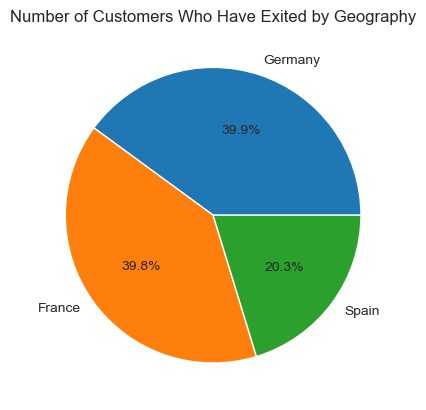

Percentage of customers who have exited and have a credit card: 69.92%


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv("data.csv")

# Create a new DataFrame for customers who have exited
exited_customers = df[df["Exited"] == 1]

# Calculate the number of customers who have exited for each geography
exited_customers_per_geography = exited_customers["Geography"].value_counts()

# Create a pie chart to visualize the number of customers who have exited for each geography
plt.pie(exited_customers_per_geography.values, labels=exited_customers_per_geography.index, autopct="%1.1f%%")
plt.title("Number of Customers Who Have Exited by Geography")
plt.show()

# Create a new DataFrame for customers who have exited and have a credit card
exited_customers_with_cr_card = exited_customers[exited_customers["HasCrCard"] == 1]

# Calculate the percentage of customers who have exited and have a credit card
percentage_exited_with_cr_card = (len(
    exited_customers_with_cr_card
) / len(exited_customers)
                                  ) * 100

# Print the percentage of customers who have exited and have a credit card
print(
    f"Percentage of customers who have exited and have a credit card: {percentage_exited_with_cr_card:.2f}%"
)


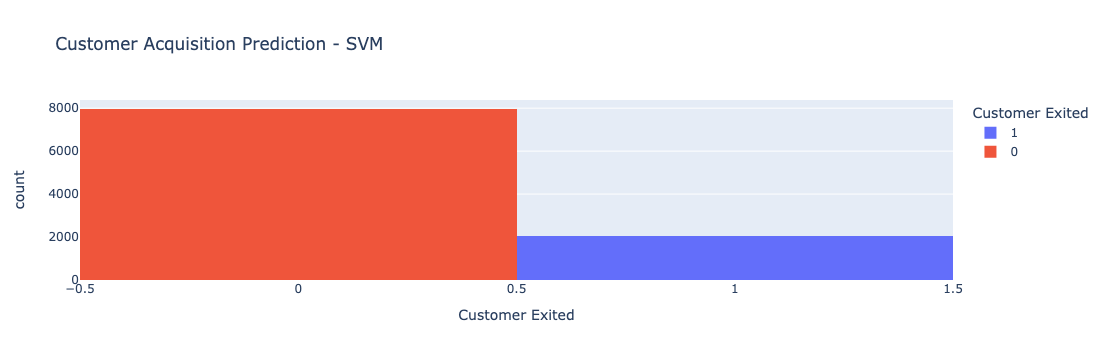

Customer Acquisition Prediction (SVM):
Accuracy: 80.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       1.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.72      2000


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px

# Load data from CSV file
data = pd.read_csv('data.csv')

# Support Vector Machines (SVM) for Customer Acquisition
target_variable_acquisition = 'Exited'
features_acquisition = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', target_variable_acquisition])
X_train, X_test, y_train, y_test = train_test_split(features_acquisition, data[target_variable_acquisition], test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = ['Geography', 'Gender', 'Card Type']

# Create pipeline for preprocessing categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess features with categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create an SVM classifier with preprocessing pipeline
svm_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', SVC(random_state=42))])

# Fit the model and make predictions
svm_classifier.fit(X_train, y_train)
predictions_acquisition = svm_classifier.predict(X_test)
accuracy_acquisition = accuracy_score(y_test, predictions_acquisition)

# Visualize results using plotly
fig = px.histogram(data, x='Exited', color='Exited', title='Customer Acquisition Prediction - SVM',
                   labels={'Exited': 'Customer Exited'})
fig.show()

# Print results
print("Customer Acquisition Prediction (SVM):")
print(f"Accuracy: {accuracy_acquisition:.2%}")
print("Classification Report:")
print(classification_report(y_test, predictions_acquisition, zero_division=1))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
data = pd.read_csv('data.csv')

# Drop unnecessary columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']
data = data.drop(columns=columns_to_drop)

# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Train XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate and print results
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("XGBoost Classifier:")
print(classification_report(y_test, xgb_predictions))

# Visualize Customer Churn using a line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Age', y='Exited', estimator='mean', hue='Gender')
plt.title('Customer Churn based on Age')
plt.xlabel('Age')
plt.ylabel('Churn Probability')
plt.legend(title='Gender', loc='upper right')
plt.show()


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000
